In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

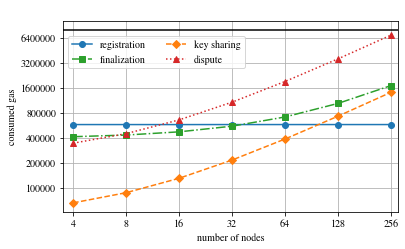

In [5]:
fig, ax = plt.subplots()

num_nodes = [4, 8, 16, 32, 64, 128, 256]

# from ../client/gas_evaluation.py
data = {
    'registration':    [575656, 575528, 575336,  575784,  575656,  575720,  575656],
    'key sharing':     [ 65252,  86584, 129255,  214560,  385087,  726381, 1410760],
    'finalization':    [410586, 430172, 470231,  550245,  710949, 1036015, 1699957],
    'dispute':         [343105, 447148, 655634, 1072419, 1905875, 3574766, 6917072],
}

for i, (phase, consumed_gas) in enumerate(data.items()):
    plt.plot(num_nodes, 
             consumed_gas, 
             linestyle=['-', '--', '-.', ':'][i], 
             marker=['o', 'D', 's', '^'][i], 
             label=phase)
    
fig.set_size_inches(6, 3.5)
ax.grid(True)
ax.set_xlabel('number of nodes')
ax.set_ylabel('consumed gas')

ax.set_xscale('log')
ax.set_xticks(num_nodes)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlim([3.5, 280])

ax.set_yscale('log')
ax.set_yticks([50_000, 100_000, 200_000, 400_000, 800_000, 1_600_000, 3_200_000, 6_400_000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.minorticks_off()
ax.set_title(' ')

handles, labels = ax.get_legend_handles_labels()

plt.plot([0, 400], [8_000_000]*2, color='black', label='block gas limit')
plt.legend(flip(handles, 2), flip(labels, 2), loc='upper left', ncol=2, bbox_to_anchor=(0.0, 0.95))

# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=10)

plt.savefig('gas-consumption.pdf', bbox_inches='tight', pad_inches=0)
plt.show()